In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kahve=pd.read_csv('/kaggle/input/daily-coffee-price/coffee.csv')


/kaggle/input/daily-coffee-price/coffee.csv


import matplotlib.pyplot as plt

In [24]:
import matplotlib.pyplot as plt

In [17]:
kahve


,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD
...,...,...,...,...,...,...,...
5741,2022-08-29,240.55,240.55,240.55,240.50,1,USD
5742,2022-08-30,238.75,241.75,238.75,239.15,14,USD
5743,2022-08-31,240.75,240.75,239.65,239.10,12,USD
5744,2022-09-01,238.55,238.55,236.60,236.35,6,USD


In [18]:
kahve.head(3)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.0,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.5,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.0,115.00,118.60,6165,USD


In [19]:
kahve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5746 non-null   object 
 1   Open      5746 non-null   float64
 2   High      5746 non-null   float64
 3   Low       5746 non-null   float64
 4   Close     5746 non-null   float64
 5   Volume    5746 non-null   int64  
 6   Currency  5746 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.4+ KB


In [22]:
kahve['Date']=pd.to_datetime(kahve['Date'])

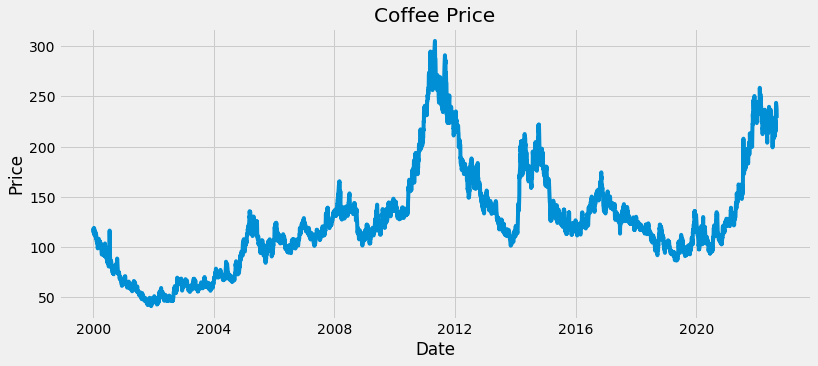

In [25]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,5))
plt.plot(kahve['Date'],kahve['Close'])
plt.title("Coffee Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [31]:
kahve1y=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).mean()
kahve1ymin=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).min()
kahve1ymax=kahve.groupby(pd.Grouper(key='Date',freq="1Y")).max()

In [29]:
kahve1y.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2000-12-31,89.698000,91.102800,88.619200,89.606600,3644.852000
2001-12-31,54.867418,55.786475,54.261270,54.927459,3484.610656
2002-12-31,53.158434,54.163855,52.571285,53.379317,3938.329317


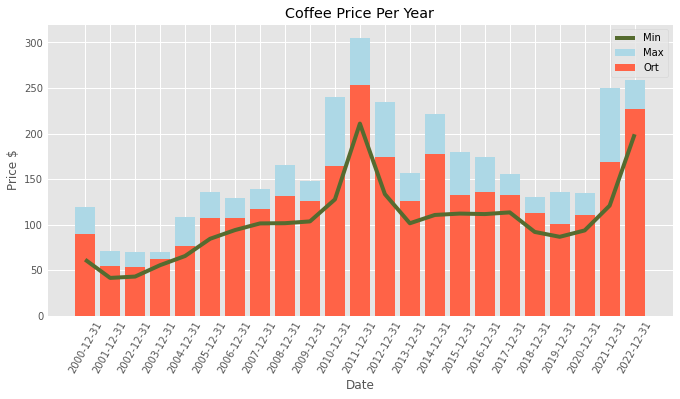

In [39]:
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.bar(kahve1y.index.astype("string"),kahve1ymax['Close'],color="lightblue")
plt.bar(kahve1y.index.astype("string"),kahve1y['Close'],color="tomato")
plt.plot(kahve1y.index.astype("string"),kahve1ymin['Close'],color="DarkOliveGreen")
plt.legend(["Min","Max","Ort"])
plt.xlabel("Date")
plt.ylabel("Price $")
plt.xticks(rotation=61)
plt.title("Coffee Price Per Year")
plt.show()
